# 

<figure>
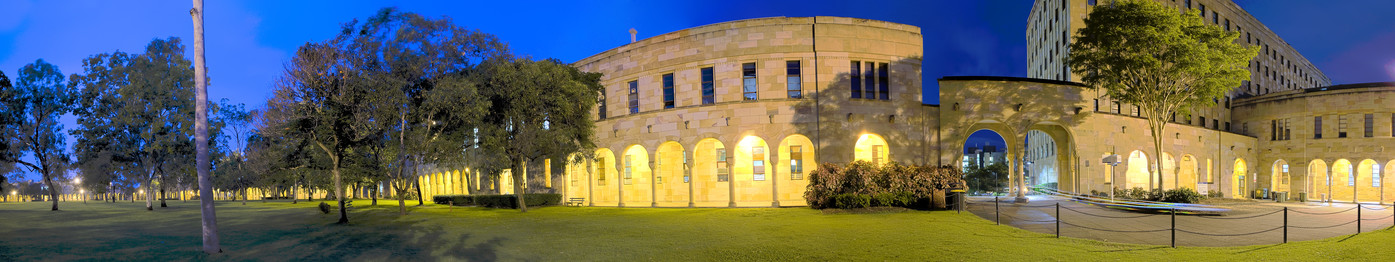
<figcaption aria-hidden="true">An interactive LADAL
notebook</figcaption>
</figure>

This tutorial is the interactive Jupyter notebook accompanying the
[*Language Technology and Data Analysis Laboratory* (LADAL) tutorial
*Regular Expressions in R*](tutorials/regex.html).

**Preparation and session set up**

We set up our session by activating the packages we need for this
tutorial.

In [ ]:
library(dplyr)
library(stringr)
library(htmlwidgets)

Once you have initiated the session by executing the code shown above,
you are good to go.

If you are using this notebook on your own computer and you have not
already installed the R packages listed above, you need to install them.
You can install them by replacing the `library` command with
`install.packages` and putting the name of the package into quotation
marks like this: `install.packages("dplyr")`. Then, you simply run this
command and R will install the package you specified.

# Getting started with Regular Expressions

To put regular expressions into practice, we need some text that we will
perform out searches on. In this tutorial, we will use texts from
wikipedia about grammar.

In [ ]:
# read in first text
text1 <- readLines("notebooks/regex_cb/data/testcorpus/linguistics02.txt")
et <- paste(text1, sep = " ", collapse = " ")
# inspect example text
et

[1] "Grammar is a system of rules which governs the production and use of utterances in a given language. These rules apply to sound as well as meaning, and include componential subsets of rules, such as those pertaining to phonology (the organisation of phonetic sound systems), morphology (the formation and composition of words), and syntax (the formation and composition of phrases and sentences). Many modern theories that deal with the principles of grammar are based on Noam Chomsky's framework of generative linguistics."

In addition, we will split the example text into words to have another
resource we can use to understand regular expressions

In [ ]:
# split example text
set <- str_split(et, " ") %>%
    unlist()
# inspect
head(set)

[1] "Grammar" "is"      "a"       "system"  "of"      "rules"  

## Using your own data

While the tutorial uses data from the LADAL website, you can also use
your own data. You can see below what you need to do to upload and use
your own data.

The code chunk below allows you to upload two files from your own
computer. To be able to load your own data, you need to click on the
folder symbol to the left of the screen:

<figure>
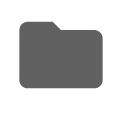
<figcaption aria-hidden="true">Binder Folder Symbol</figcaption>
</figure>

Then, when the menu has unfolded, click on the smaller folder symbol
(encircled in red in the picture below).

<figure>
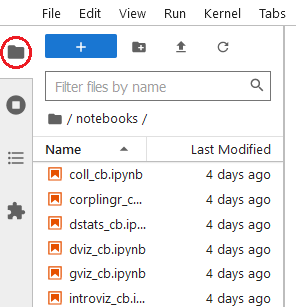
<figcaption aria-hidden="true">Small Binder Folder Symbol</figcaption>
</figure>

Now, you are in the main menu and can click on the ‘MyData’ folder.

<figure>
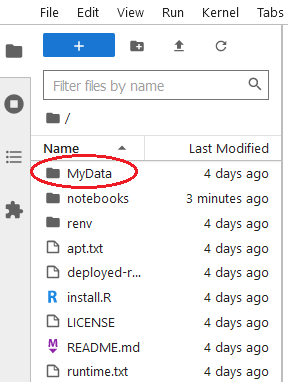
<figcaption aria-hidden="true">MyData Folder Symbol</figcaption>
</figure>

Now, that you are in the MyData folder, you can click on the upload
symbol.

<figure>
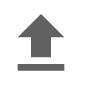
<figcaption aria-hidden="true">Binder Upload Symbol</figcaption>
</figure>

Select and upload the files you want to analyze (**IMPORTANT: here, we
assume that you upload some form of text data - not tabular data! You
can upload only txt and docx files!**). When you then execute the code
chunk below, you will upload your own data and you can then use it in
this notebook.

In [ ]:
myfiles <- list.files(here::here("MyData"), # path to the corpus data
    # full paths - not just the names of the files
    full.names = T
)
# load colt files
mytext <- sapply(myfiles, function(x) {
    x <- scan(x,
        what = "char",
        sep = "",
        quote = "",
        quiet = T,
        skipNul = T
    )
    x <- paste0(x, sep = " ", collapse = " ")
    x <- stringr::str_squish(x)
})
# inspect
str(mytext)

 Named list()

**Keep in mind though that you need to adapt the names of the texts in
the code chunks below so that the code below work on your own texts!**

------------------------------------------------------------------------

Before we delve into using regular expressions, we will have a look at
the regular expressions that can be used in R and also check what they
stand for.

There are three basic types of regular expressions:

-   regular expressions that stand for individual symbols and determine
    frequencies

-   regular expressions that stand for classes of symbols

-   regular expressions that stand for structural properties

The regular expressions below show the first type of regular
expressions, i.e. regular expressions that stand for individual symbols
and determine frequencies.

<figure>
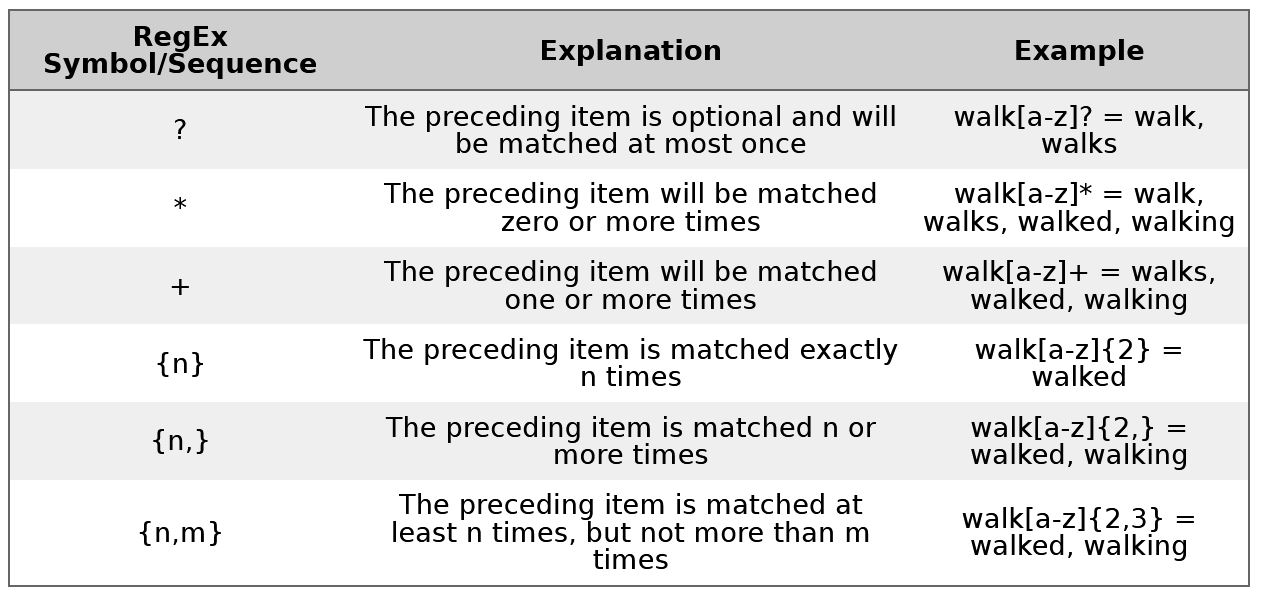
<figcaption aria-hidden="true">Regular expressions that stand for
individual symbols and determine frequencies.</figcaption>
</figure>

The regular expressions below show the second type of regular
expressions, i.e. regular expressions that stand for classes of symbols.

<figure>
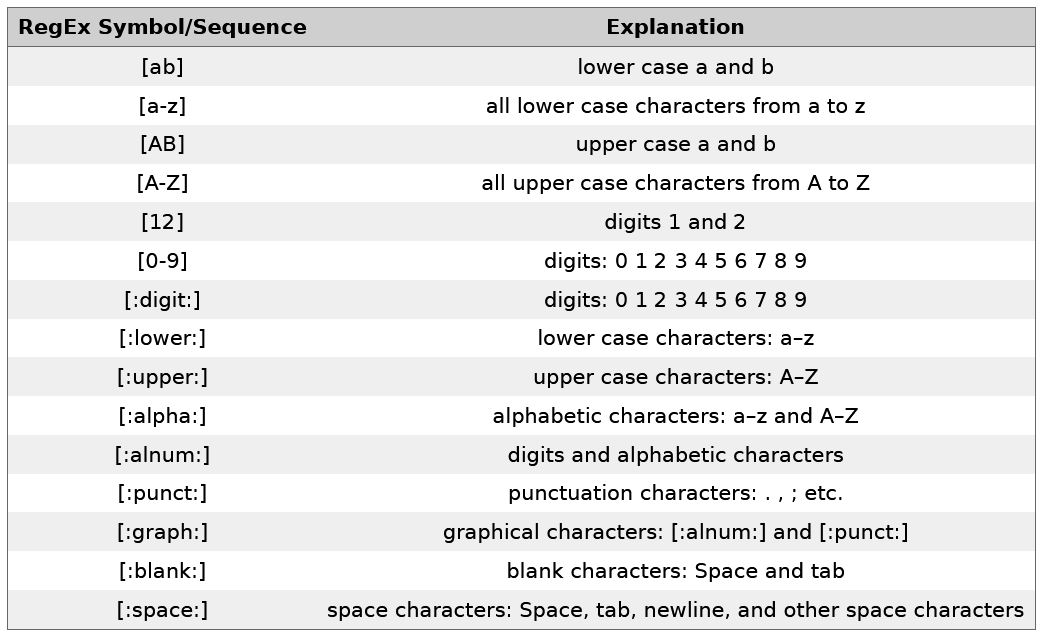
<figcaption aria-hidden="true">Regular expressions that stand for
classes of symbols.</figcaption>
</figure>

The regular expressions that denote classes of symbols are enclosed in
`[]` and `:`. The last type of regular expressions, i.e. regular
expressions that stand for structural properties are shown below.

<figure>
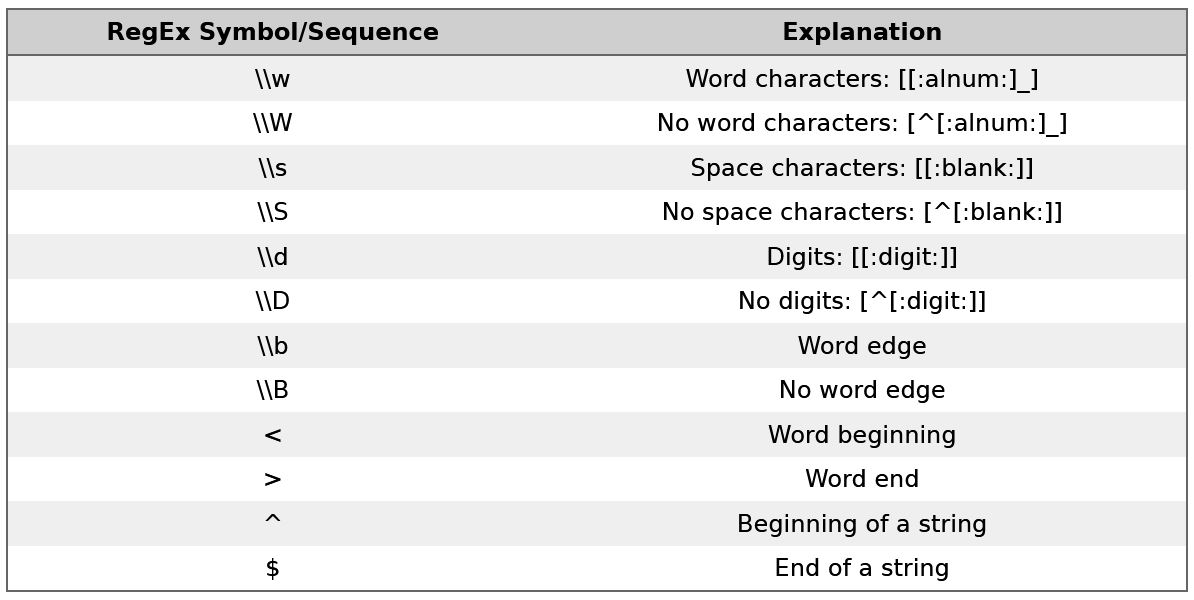
<figcaption aria-hidden="true">Regular expressions that stand for
structural properties.</figcaption>
</figure>

# Practice

In this section, we will explore how to use regular expressions. At the
end, we will go through some exercises to help you understand how you
can best utilize regular expressions.

Show all words in the split example text that contain `a` or `n`.

In [ ]:
set[str_detect(set, "[an]")]

 [1] "Grammar"      "a"            "governs"      "production"   "and"         
 [6] "utterances"   "in"           "a"            "given"        "language."   
[11] "apply"        "sound"        "as"           "as"           "meaning,"    
[16] "and"          "include"      "componential" "as"           "pertaining"  
[21] "phonology"    "organisation" "phonetic"     "sound"        "formation"   
[26] "and"          "composition"  "and"          "syntax"       "formation"   
[31] "and"          "composition"  "phrases"      "and"          "sentences)." 
[36] "Many"         "modern"       "that"         "deal"         "principles"  
[41] "grammar"      "are"          "based"        "on"           "Noam"        
[46] "framework"    "generative"   "linguistics."

Show all words in the split example text that begin with a lower case
`a`.

In [ ]:
set[str_detect(set, "^a")]

 [1] "a"     "and"   "a"     "apply" "as"    "as"    "and"   "as"    "and"  
[10] "and"   "and"   "and"   "are"  

Show all words in the split example text that end in a lower case `s`.

In [ ]:
set[str_detect(set, "s$")]

 [1] "is"         "rules"      "governs"    "utterances" "rules"     
 [6] "as"         "as"         "subsets"    "as"         "phrases"   
[11] "theories"   "principles" "Chomsky's" 

Show all words in the split example text in which there is an `e`, then
any other character, and than another `n`.

In [ ]:
set[str_detect(set, "e.n")]

[1] "governs"  "meaning," "modern"  

Show all words in the split example text in which there is an `e`, then
two other characters, and than another `n`.

In [ ]:
set[str_detect(set, "e.{2,2}n")]

[1] "utterances"

Show all words that consist of exactly three alphabetical characters in
the split example text.

In [ ]:
set[str_detect(set, "^[:alpha:]{3,3}$")]

 [1] "the" "and" "use" "and" "and" "and" "and" "and" "the" "are"

Show all words that consist of six or more alphabetical characters in
the split example text.

In [ ]:
set[str_detect(set, "^[:alpha:]{6,}$")]

 [1] "Grammar"      "system"       "governs"      "production"   "utterances"  
 [6] "include"      "componential" "subsets"      "pertaining"   "phonology"   
[11] "organisation" "phonetic"     "morphology"   "formation"    "composition" 
[16] "syntax"       "formation"    "composition"  "phrases"      "modern"      
[21] "theories"     "principles"   "grammar"      "framework"    "generative"  

Replace all lower case `a`s with upper case `E`s in the example text.

In [ ]:
str_replace_all(et, "a", "E")

[1] "GrEmmEr is E system of rules which governs the production End use of utterEnces in E given lEnguEge. These rules Epply to sound Es well Es meEning, End include componentiEl subsets of rules, such Es those pertEining to phonology (the orgEnisEtion of phonetic sound systems), morphology (the formEtion End composition of words), End syntEx (the formEtion End composition of phrEses End sentences). MEny modern theories thEt deEl with the principles of grEmmEr Ere bEsed on NoEm Chomsky's frEmework of generEtive linguistics."

Remove all non-alphabetical characters in the split example text.

In [ ]:
str_remove_all(set, "\\W")

 [1] "Grammar"      "is"           "a"            "system"       "of"          
 [6] "rules"        "which"        "governs"      "the"          "production"  
[11] "and"          "use"          "of"           "utterances"   "in"          
[16] "a"            "given"        "language"     "These"        "rules"       
[21] "apply"        "to"           "sound"        "as"           "well"        
[26] "as"           "meaning"      "and"          "include"      "componential"
[31] "subsets"      "of"           "rules"        "such"         "as"          
[36] "those"        "pertaining"   "to"           "phonology"    "the"         
[41] "organisation" "of"           "phonetic"     "sound"        "systems"     
[46] "morphology"   "the"          "formation"    "and"          "composition" 
[51] "of"           "words"        "and"          "syntax"       "the"         
[56] "formation"    "and"          "composition"  "of"           "phrases"     
[61] "and"          "sentences"    "Many

Remove all white spaces in the example text.

In [ ]:
str_remove_all(et, " ")

[1] "Grammarisasystemofruleswhichgovernstheproductionanduseofutterancesinagivenlanguage.Theserulesapplytosoundaswellasmeaning,andincludecomponentialsubsetsofrules,suchasthosepertainingtophonology(theorganisationofphoneticsoundsystems),morphology(theformationandcompositionofwords),andsyntax(theformationandcompositionofphrasesandsentences).ManymoderntheoriesthatdealwiththeprinciplesofgrammararebasedonNoamChomsky'sframeworkofgenerativelinguistics."

------------------------------------------------------------------------

[Back to LADAL](tutorials/regex.html)

------------------------------------------------------------------------